<a href="https://colab.research.google.com/github/oerv13-gh/Ibero/blob/main/Semana5_Apre_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Agregar Disco Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Crear variable df con el dataset, tener en cuenta no usar encabezado del dataset

df = pd.read_csv('/content/drive/MyDrive/POWER_Point_Hourly_5years (3).csv', sep = ',', encoding = "ISO-8859-1", skiprows=15)
print(df)


       YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  \
0      2020   1   1   0                0.0  16.11  97.02         2.12  82.31   
1      2020   1   1   1                0.0  16.04  96.61         2.13  82.26   
2      2020   1   1   2                0.0  15.88  96.98         2.16  82.22   
3      2020   1   1   3                0.0  15.62  97.36         1.86  82.22   
4      2020   1   1   4                0.0  15.40  97.65         1.27  82.24   
...     ...  ..  ..  ..                ...    ...    ...          ...    ...   
43867  2025   1   1  19                0.0  17.33  87.88         4.76  82.31   
43868  2025   1   1  20                0.0  16.77  89.14         3.94  82.37   
43869  2025   1   1  21                0.0  16.34  89.32         4.12  82.39   
43870  2025   1   1  22                0.0  16.28  87.29         6.85  82.41   
43871  2025   1   1  23                0.0  16.15  87.59         7.40  82.41   

       WS10M  WD10M  
0       1.43   35

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43872 entries, 0 to 43871
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               43872 non-null  int64  
 1   MO                 43872 non-null  int64  
 2   DY                 43872 non-null  int64  
 3   HR                 43872 non-null  int64  
 4   ALLSKY_SFC_SW_DWN  43872 non-null  float64
 5   T2M                43872 non-null  float64
 6   RH2M               43872 non-null  float64
 7   PRECTOTCORR        43872 non-null  float64
 8   PS                 43872 non-null  float64
 9   WS10M              43872 non-null  float64
 10  WD10M              43872 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.7 MB
None


In [5]:
print(df.isnull().sum())

YEAR                 0
MO                   0
DY                   0
HR                   0
ALLSKY_SFC_SW_DWN    0
T2M                  0
RH2M                 0
PRECTOTCORR          0
PS                   0
WS10M                0
WD10M                0
dtype: int64


In [6]:
print(df.describe())

               YEAR            MO            DY            HR  \
count  43872.000000  43872.000000  43872.000000  43872.000000   
mean    2022.001641      6.518053     15.727024     11.500000   
std        1.416355      3.450724      8.806826      6.922265   
min     2020.000000      1.000000      1.000000      0.000000   
25%     2021.000000      4.000000      8.000000      5.750000   
50%     2022.000000      7.000000     16.000000     11.500000   
75%     2023.000000     10.000000     23.000000     17.250000   
max     2025.000000     12.000000     31.000000     23.000000   

       ALLSKY_SFC_SW_DWN           T2M          RH2M   PRECTOTCORR  \
count       43872.000000  43872.000000  43872.000000  43872.000000   
mean          195.885959     19.045799     78.475345      4.808085   
std           260.551693      3.483269     15.266261      9.519440   
min             0.000000      9.610000     28.970000      0.000000   
25%             0.000000     16.240000     65.170000      0.1000

In [7]:
# Filtrar las filas donde HR (hora) esté entre 6 y 18 (inclusive)
df_filtrado = df[(df['HR'] >= 6) & (df['HR'] <= 18)]
df_filtrado = df_filtrado.reset_index(drop=True)

# Mostrar información del DataFrame filtrado
print(df_filtrado.head())
print(f"\nForma del DataFrame original: {df.shape}")
print(f"Forma del DataFrame filtrado: {df_filtrado.shape}")

   YEAR  MO  DY  HR  ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  \
0  2020   1   1   6              33.28  15.78  96.63         0.77  82.32   
1  2020   1   1   7             207.25  17.67  90.35         0.34  82.40   
2  2020   1   1   8             435.62  19.64  77.93         0.41  82.45   
3  2020   1   1   9             554.85  21.35  69.21         0.79  82.46   
4  2020   1   1  10             664.55  22.50  65.11         1.29  82.42   

   WS10M  WD10M  
0   1.47   53.3  
1   1.83   54.1  
2   1.82   36.3  
3   1.59   13.1  
4   1.60  349.9  

Forma del DataFrame original: (43872, 11)
Forma del DataFrame filtrado: (23764, 11)


In [9]:
# Crear nuevo dataframe sin columnas identificadoras
cols_a_evaluar = [col for col in df_filtrado.columns if col not in ['YEAR','MO','DY','HR']]

df_eda = df_filtrado[cols_a_evaluar]

print(df_eda)


       ALLSKY_SFC_SW_DWN    T2M   RH2M  PRECTOTCORR     PS  WS10M  WD10M
0                  33.28  15.78  96.63         0.77  82.32   1.47   53.3
1                 207.25  17.67  90.35         0.34  82.40   1.83   54.1
2                 435.62  19.64  77.93         0.41  82.45   1.82   36.3
3                 554.85  21.35  69.21         0.79  82.46   1.59   13.1
4                 664.55  22.50  65.11         1.29  82.42   1.60  349.9
...                  ...    ...    ...          ...    ...    ...    ...
23759             558.05  24.03  54.33         0.21  82.13   1.11  311.3
23760             377.27  23.42  56.97         0.37  82.10   1.37  305.8
23761             187.75  22.15  64.71         1.43  82.12   1.31  312.8
23762              35.85  19.77  80.81         4.14  82.16   1.03  325.2
23763               0.00  17.73  87.72         6.82  82.23   0.93  349.4

[23764 rows x 7 columns]


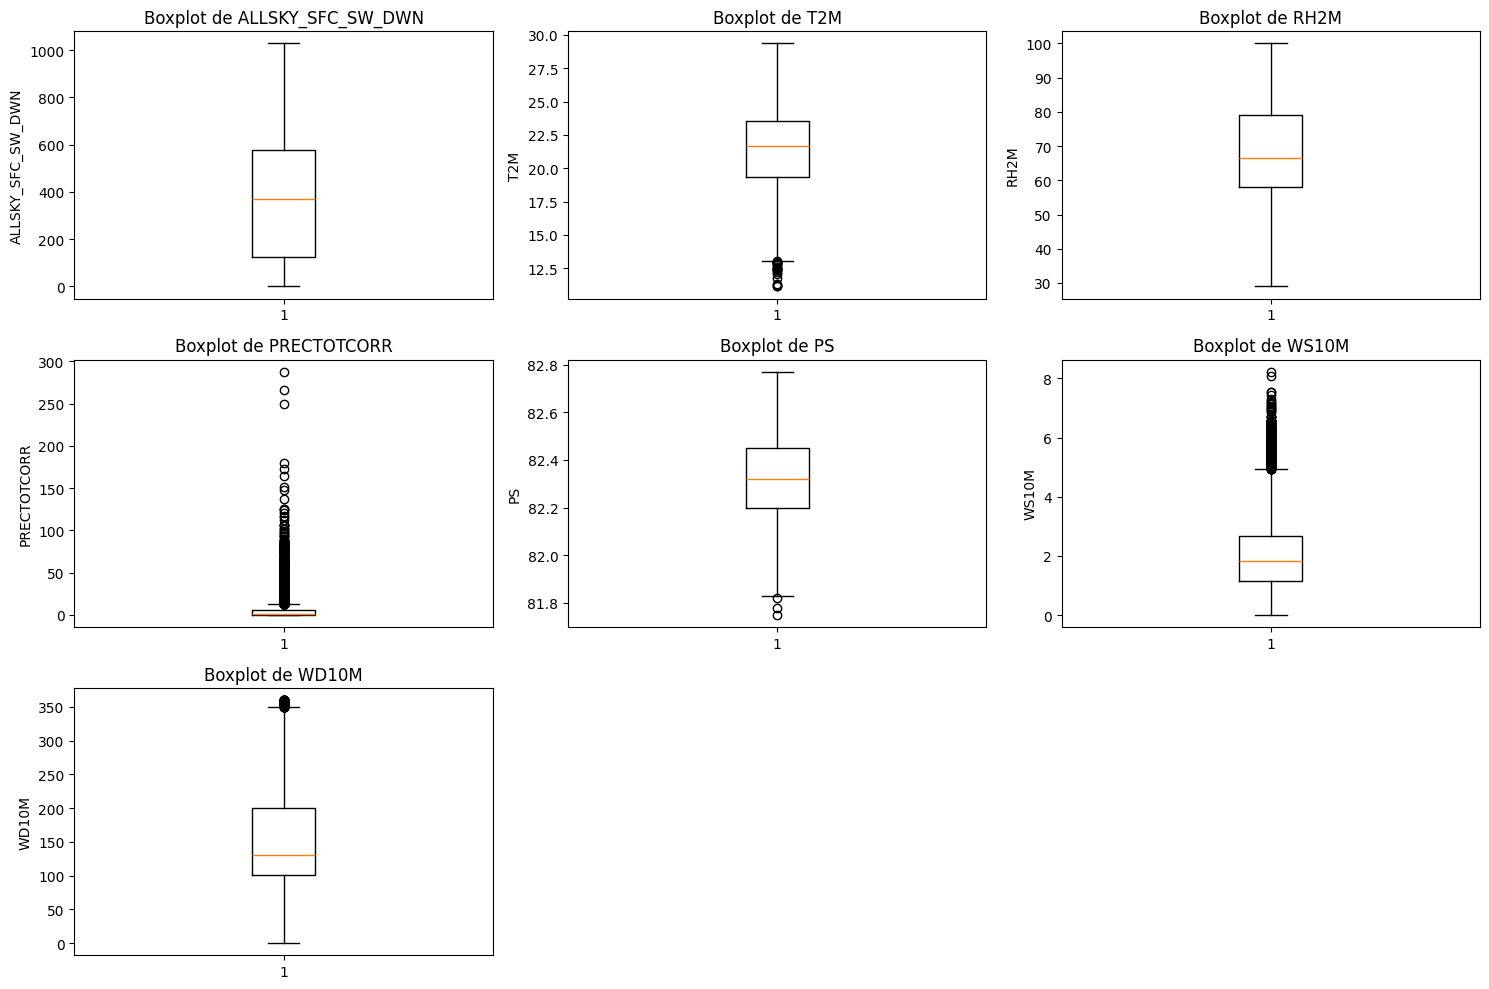

In [10]:
# Crear gráficos de caja y bigote para detectar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_a_evaluar, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df_filtrado[col].dropna())
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [11]:
def identificar_outliers_iqr(df, columnas):
    outliers_info = {}

    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = {
            'n_outliers': len(outliers),
            'porcentaje': (len(outliers) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        print(f"{col}: {len(outliers)} outliers ({outliers_info[col]['porcentaje']:.2f}%)")

    return outliers_info

outliers_info = identificar_outliers_iqr(df_filtrado, cols_a_evaluar)


ALLSKY_SFC_SW_DWN: 0 outliers (0.00%)
T2M: 22 outliers (0.09%)
RH2M: 0 outliers (0.00%)
PRECTOTCORR: 2390 outliers (10.06%)
PS: 3 outliers (0.01%)
WS10M: 406 outliers (1.71%)
WD10M: 539 outliers (2.27%)


In [12]:
def eliminar_outliers_iqr(df, columnas):
    df_clean = df.copy()

    for col in columnas:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar para mantener solo valores dentro de los límites
        mask = (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        df_clean = df_clean[mask]

    return df_clean.reset_index(drop=True)

df_clean = eliminar_outliers_iqr(df_filtrado, cols_a_evaluar)

In [13]:
from sklearn.preprocessing import StandardScaler

# Separar columnas que NO queremos escalar
columnas_no_escalar = ['YEAR', 'MO', 'DY', 'HR','PRECTOTCORR']
columnas_a_escalar = [col for col in df_clean.columns if col not in columnas_no_escalar]

# Crear copia del DataFrame
df_escalado = df_clean.copy()

# Inicializar y aplicar StandardScaler
scaler = StandardScaler()
df_escalado[columnas_a_escalar] = scaler.fit_transform(df_clean[columnas_a_escalar])

# Verificar
print("Media de columnas escaladas (debería ser ~0):")
print(df_escalado[columnas_a_escalar].mean())
print("\nDesviación estándar de columnas escaladas (debería ser ~1):")
print(df_escalado[columnas_a_escalar].std())


Media de columnas escaladas (debería ser ~0):
ALLSKY_SFC_SW_DWN   -1.727806e-17
T2M                  5.141949e-16
RH2M                -3.123872e-16
PS                  -1.705137e-14
WS10M                3.206807e-16
WD10M               -5.252529e-17
dtype: float64

Desviación estándar de columnas escaladas (debería ser ~1):
ALLSKY_SFC_SW_DWN    1.000024
T2M                  1.000024
RH2M                 1.000024
PS                   1.000024
WS10M                1.000024
WD10M                1.000024
dtype: float64


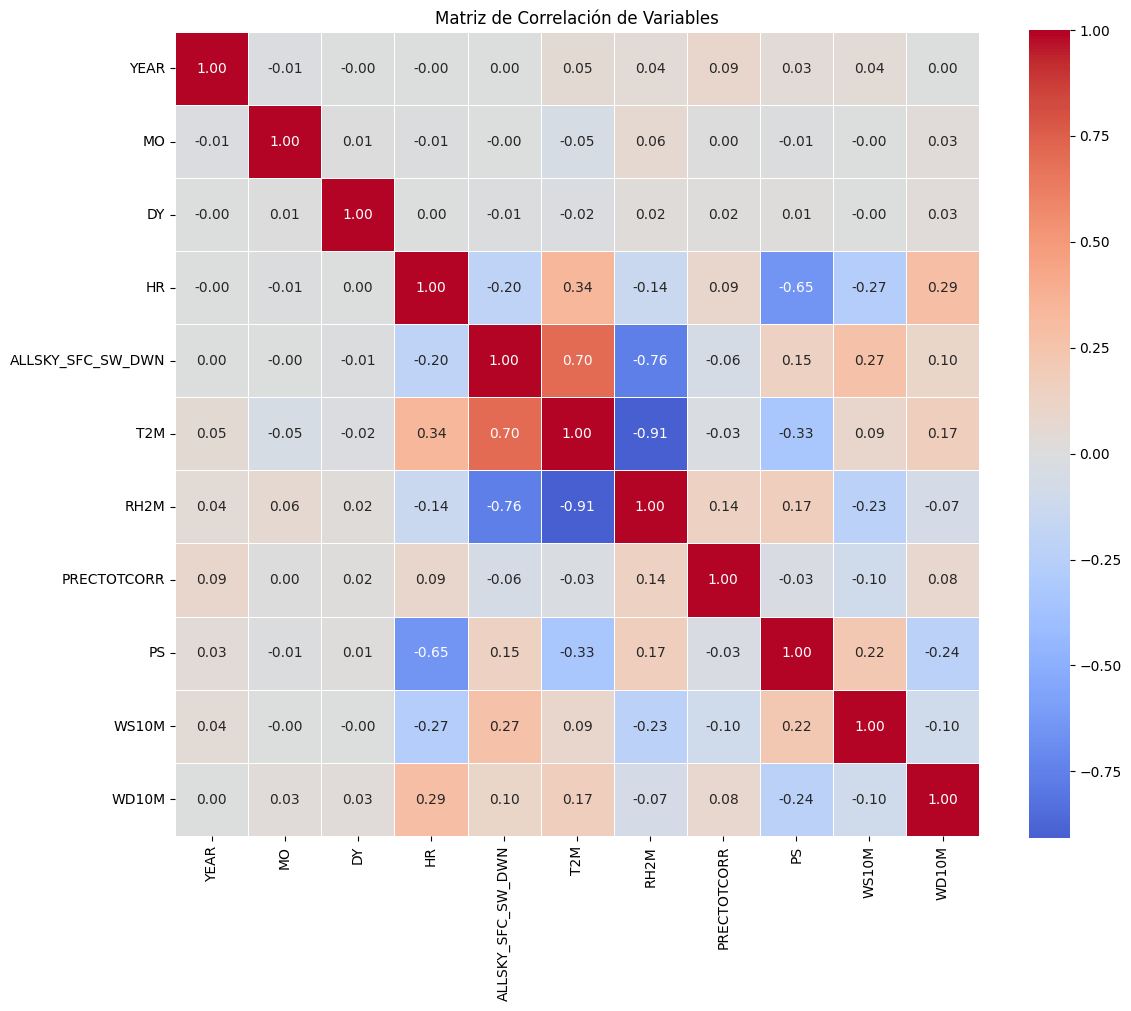

In [14]:
# Crear matriz de correlación
correlation_matrix = df_escalado.corr()

# Mostrar matriz completa
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Matriz de Correlación de Variables')
plt.tight_layout()
plt.show()


In [15]:
# Extraer correlaciones con la variable objetivo (radiación solar)
correlacion_con_target = correlation_matrix['ALLSKY_SFC_SW_DWN'].sort_values(ascending=False)

print("Correlación de todas las variables con ALLSKY_SFC_SW_DWN:")
print("=" * 60)
for idx, (variable, corr) in enumerate(correlacion_con_target.items(), 1):
    print(f"{idx:2d}. {variable:20s}: {corr:7.4f}")

print("\n" + "=" * 60)
print("RESUMEN DE CORRELACIONES:")
print("=" * 60)

# Separar variables positivas y negativas
positivas = correlacion_con_target[correlacion_con_target > 0].drop('ALLSKY_SFC_SW_DWN')
negativas = correlacion_con_target[correlacion_con_target < 0]

print("\nVariables con correlación POSITIVA (mayor radiación):")
for var, corr in positivas.head(5).items():
    print(f"  {var:15s}: {corr:.4f}")

print("\nVariables con correlación NEGATIVA (menor radiación):")
for var, corr in negativas.head(5).items():
    print(f"  {var:15s}: {corr:.4f}")


Correlación de todas las variables con ALLSKY_SFC_SW_DWN:
 1. ALLSKY_SFC_SW_DWN   :  1.0000
 2. T2M                 :  0.7045
 3. WS10M               :  0.2660
 4. PS                  :  0.1501
 5. WD10M               :  0.0996
 6. YEAR                :  0.0009
 7. MO                  : -0.0029
 8. DY                  : -0.0093
 9. PRECTOTCORR         : -0.0610
10. HR                  : -0.2006
11. RH2M                : -0.7583

RESUMEN DE CORRELACIONES:

Variables con correlación POSITIVA (mayor radiación):
  T2M            : 0.7045
  WS10M          : 0.2660
  PS             : 0.1501
  WD10M          : 0.0996
  YEAR           : 0.0009

Variables con correlación NEGATIVA (menor radiación):
  MO             : -0.0029
  DY             : -0.0093
  PRECTOTCORR    : -0.0610
  HR             : -0.2006
  RH2M           : -0.7583


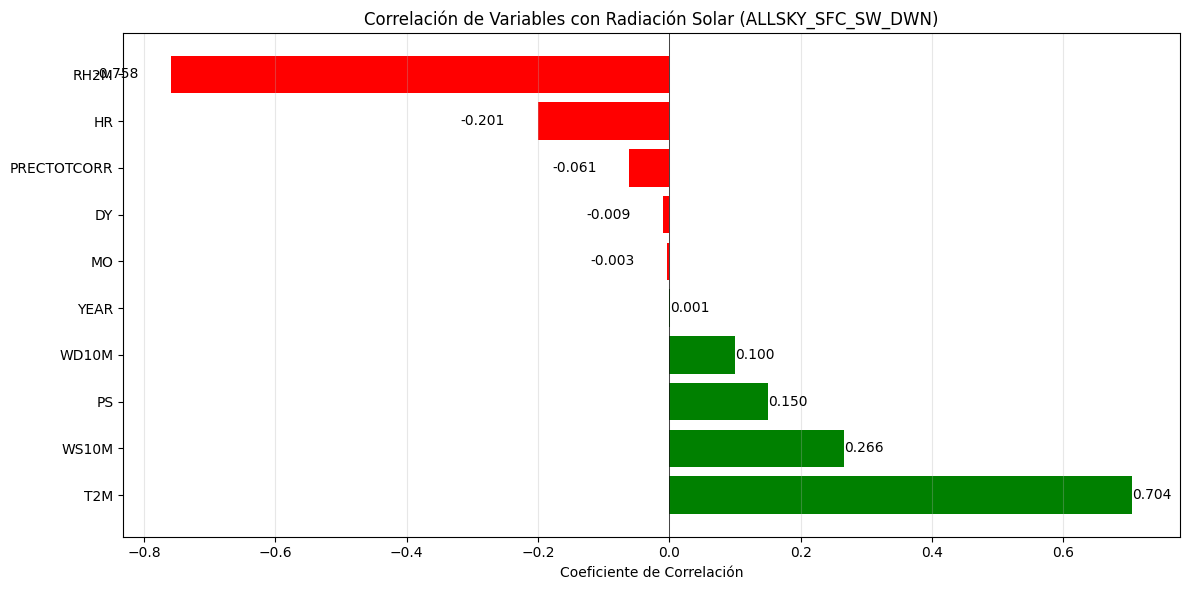

In [16]:
# Gráfico de barras de correlaciones
plt.figure(figsize=(12, 6))
correlaciones_plot = correlacion_con_target.drop('ALLSKY_SFC_SW_DWN')
colors = ['green' if x > 0 else 'red' for x in correlaciones_plot.values]

bars = plt.barh(correlaciones_plot.index, correlaciones_plot.values, color=colors)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.xlabel('Coeficiente de Correlación')
plt.title('Correlación de Variables con Radiación Solar (ALLSKY_SFC_SW_DWN)')
plt.grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width if width > 0 else width - 0.05,
             bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             ha='left' if width > 0 else 'right',
             va='center')

plt.tight_layout()
plt.show()


In [28]:
# Seleccionar variables predictoras y objetivo
#X = df_escalado[['T2M', 'RH2M']]  # Variables de entrada
X = df_escalado[['T2M', 'RH2M', 'HR']]
y = df_escalado['ALLSKY_SFC_SW_DWN']  # Variable objetivo

print("Dimensiones de los datos:")
print(f"X (características): {X.shape}")
print(f"y (objetivo): {y.shape}")
print("\nPrimeras filas de X:")
print(X.head())
print("\nPrimeras filas de y:")
print(y.head())


Dimensiones de los datos:
X (características): (20562, 3)
y (objetivo): (20562,)

Primeras filas de X:
        T2M      RH2M  HR
0 -1.893382  2.087613   6
1 -1.254035  1.629419   7
2 -0.587626  0.723245   8
3 -0.009169  0.087027   9
4  0.379851 -0.212113  10

Primeras filas de y:
0   -1.294472
1   -0.616366
2    0.273783
3    0.738522
4    1.166114
Name: ALLSKY_SFC_SW_DWN, dtype: float64


In [29]:
from sklearn.model_selection import train_test_split

# Split con shuffle (importante porque no es serie temporal)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # Para reproducibilidad
    shuffle=True
)

print("=" * 60)
print("TRAIN-TEST SPLIT COMPLETADO")
print("=" * 60)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print(f"\nProporción Train/Test: {X_train.shape[0]/X.shape[0]:.1%}/{X_test.shape[0]/X.shape[0]:.1%}")

# Verificar distribución
print("\nDistribución de características en train y test:")
print("-" * 40)
print("            Train         Test")
print("            Mean   Std    Mean   Std")
print("-" * 40)
for col in X.columns:
    train_mean = X_train[col].mean()
    train_std = X_train[col].std()
    test_mean = X_test[col].mean()
    test_std = X_test[col].std()
    print(f"{col:6s}  {train_mean:6.3f}  {train_std:6.3f}  {test_mean:6.3f} {test_std:6.3f}")


TRAIN-TEST SPLIT COMPLETADO
Tamaño del conjunto de entrenamiento: 16449 muestras
Tamaño del conjunto de prueba: 4113 muestras

Proporción Train/Test: 80.0%/20.0%

Distribución de características en train y test:
----------------------------------------
            Train         Test
            Mean   Std    Mean   Std
----------------------------------------
T2M     -0.003   1.002   0.012  0.991
RH2M     0.002   1.000  -0.006  1.001
HR      11.842   3.753  11.943  3.756


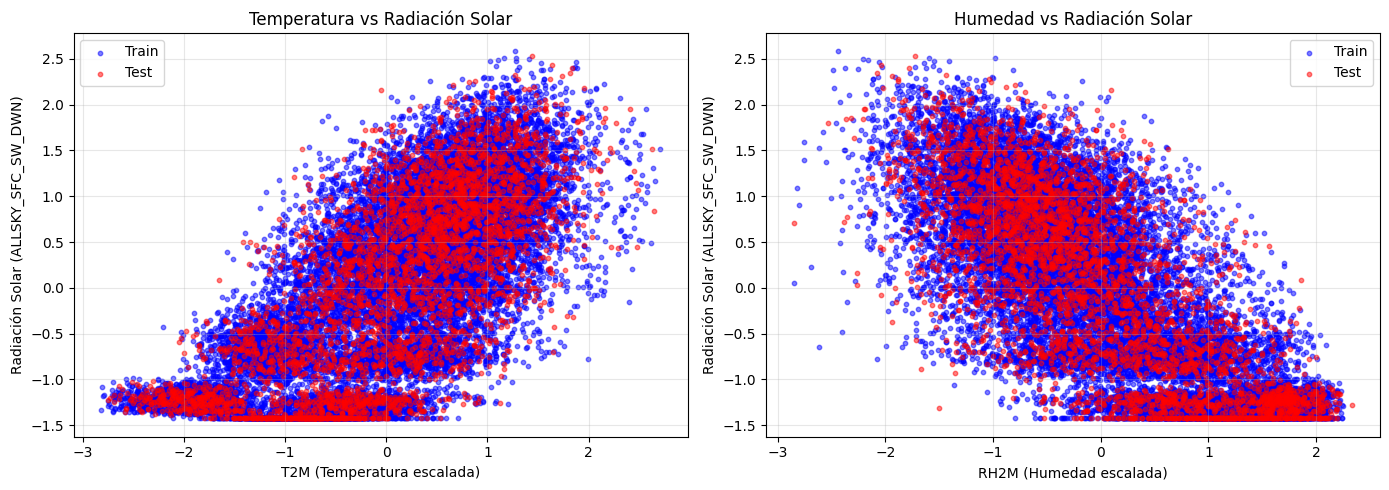

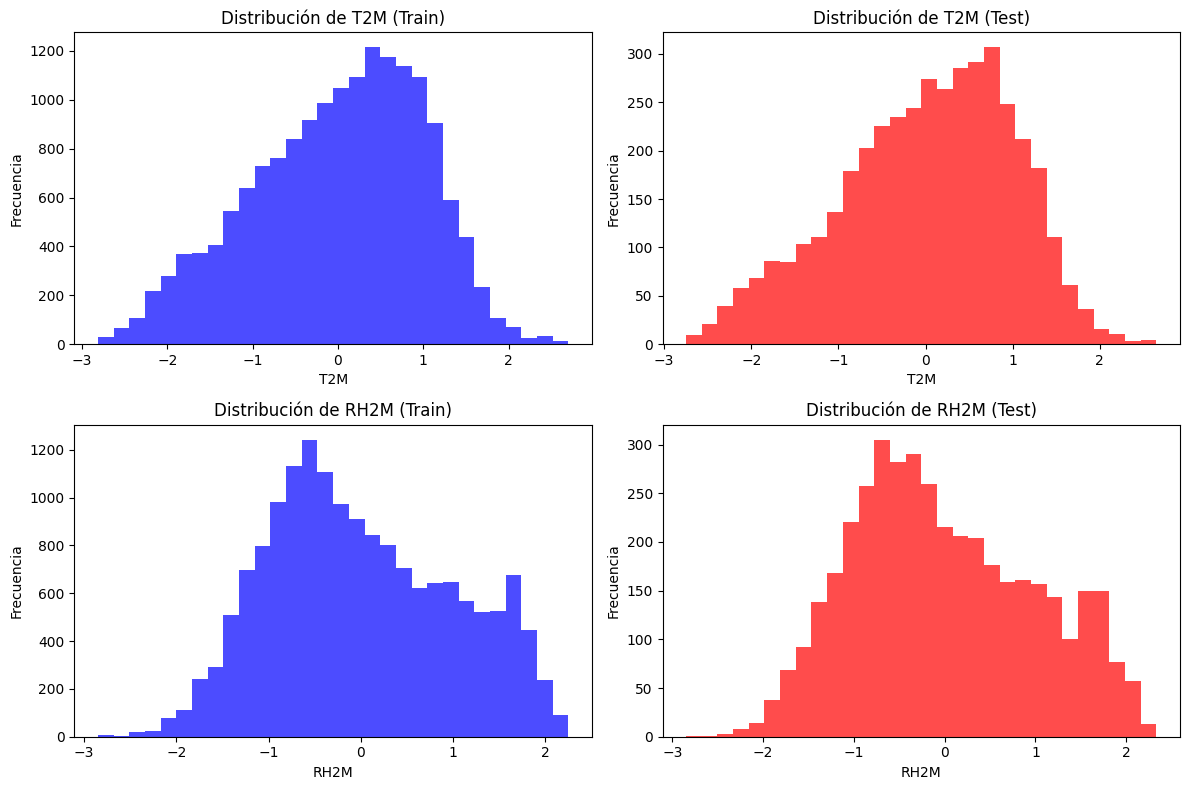

In [30]:
# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot T2M vs Radiación
axes[0].scatter(X_train['T2M'], y_train, alpha=0.5, s=10, label='Train', color='blue')
axes[0].scatter(X_test['T2M'], y_test, alpha=0.5, s=10, label='Test', color='red')
axes[0].set_xlabel('T2M (Temperatura escalada)')
axes[0].set_ylabel('Radiación Solar (ALLSKY_SFC_SW_DWN)')
axes[0].set_title('Temperatura vs Radiación Solar')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot RH2M vs Radiación
axes[1].scatter(X_train['RH2M'], y_train, alpha=0.5, s=10, label='Train', color='blue')
axes[1].scatter(X_test['RH2M'], y_test, alpha=0.5, s=10, label='Test', color='red')
axes[1].set_xlabel('RH2M (Humedad escalada)')
axes[1].set_ylabel('Radiación Solar (ALLSKY_SFC_SW_DWN)')
axes[1].set_title('Humedad vs Radiación Solar')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Histogramas de distribución
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# T2M
axes[0, 0].hist(X_train['T2M'], bins=30, alpha=0.7, label='Train', color='blue')
axes[0, 0].set_title('Distribución de T2M (Train)')
axes[0, 0].set_xlabel('T2M')
axes[0, 0].set_ylabel('Frecuencia')

axes[0, 1].hist(X_test['T2M'], bins=30, alpha=0.7, label='Test', color='red')
axes[0, 1].set_title('Distribución de T2M (Test)')
axes[0, 1].set_xlabel('T2M')
axes[0, 1].set_ylabel('Frecuencia')

# RH2M
axes[1, 0].hist(X_train['RH2M'], bins=30, alpha=0.7, label='Train', color='blue')
axes[1, 0].set_title('Distribución de RH2M (Train)')
axes[1, 0].set_xlabel('RH2M')
axes[1, 0].set_ylabel('Frecuencia')

axes[1, 1].hist(X_test['RH2M'], bins=30, alpha=0.7, label='Test', color='red')
axes[1, 1].set_title('Distribución de RH2M (Test)')
axes[1, 1].set_xlabel('RH2M')
axes[1, 1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [32]:
# ============================================================================
# 1. DEFINICIÓN Y ENTRENAMIENTO DE MODELOS
# ============================================================================

print("=" * 70)
print("ENTRENAMIENTO DE MODELOS")
print("=" * 70)

# Modelo 1: Regresión Lineal
print("\n1. Entrenando Regresión Lineal...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Modelo 2: Random Forest
print("2. Entrenando Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Modelo 3: MLP (Red Neuronal)
print("3. Entrenando MLP (Red Neuronal)...")
mlp_model = MLPRegressor(
    hidden_layer_sizes=(50, 25, 10),  # 3 capas ocultas
    activation='relu',
    solver='adam',
    alpha=0.001,  # regularización L2
    batch_size=64,
    learning_rate='adaptive',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)

print("✓ Todos los modelos entrenados correctamente")

ENTRENAMIENTO DE MODELOS

1. Entrenando Regresión Lineal...
2. Entrenando Random Forest...
3. Entrenando MLP (Red Neuronal)...
✓ Todos los modelos entrenados correctamente


In [33]:
# ============================================================================
# 2. CÁLCULO DE MÉTRICAS
# ============================================================================

def calcular_metricas(y_true, y_pred, nombre_modelo):
    """Calcula y retorna métricas de evaluación"""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"\n{nombre_modelo}:")
    print(f"  R² (Coeficiente de determinación): {r2:.4f}")
    print(f"  RMSE (Raíz del error cuadrático medio): {rmse:.4f}")
    print(f"  MAE (Error absoluto medio): {mae:.4f}")

    return r2, rmse, mae

print("\n" + "=" * 70)
print("MÉTRICAS DE EVALUACIÓN EN TEST")
print("=" * 70)

metricas = {}
metricas['Regresión Lineal'] = calcular_metricas(y_test, lr_pred, "Regresión Lineal")
metricas['Random Forest'] = calcular_metricas(y_test, rf_pred, "Random Forest")
metricas['MLP'] = calcular_metricas(y_test, mlp_pred, "MLP")



MÉTRICAS DE EVALUACIÓN EN TEST

Regresión Lineal:
  R² (Coeficiente de determinación): 0.7295
  RMSE (Raíz del error cuadrático medio): 0.5220
  MAE (Error absoluto medio): 0.4143

Random Forest:
  R² (Coeficiente de determinación): 0.9012
  RMSE (Raíz del error cuadrático medio): 0.3155
  MAE (Error absoluto medio): 0.2186

MLP:
  R² (Coeficiente de determinación): 0.9006
  RMSE (Raíz del error cuadrático medio): 0.3165
  MAE (Error absoluto medio): 0.2221


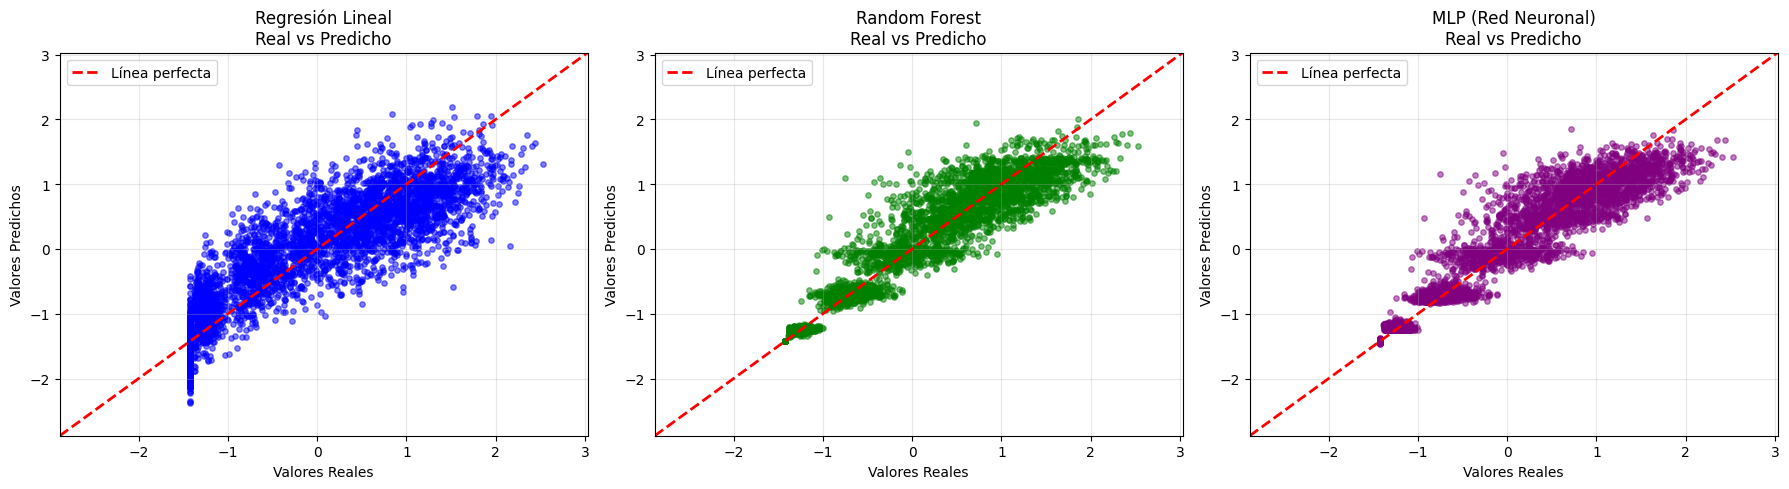

In [34]:
# ============================================================================
# 3. GRÁFICA 1: VALORES REALES VS PREDICHOS (SCATTER)
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Configurar límites para todos los gráficos
min_val = min(y_test.min(), lr_pred.min(), rf_pred.min(), mlp_pred.min())
max_val = max(y_test.max(), lr_pred.max(), rf_pred.max(), mlp_pred.max())

# Línea de referencia perfecta (y = x)
limites = [min_val - 0.5, max_val + 0.5]

# Regresión Lineal
axes[0].scatter(y_test, lr_pred, alpha=0.5, s=15, color='blue')
axes[0].plot(limites, limites, 'r--', linewidth=2, label='Línea perfecta')
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Valores Predichos')
axes[0].set_title('Regresión Lineal\nReal vs Predicho')
axes[0].set_xlim(limites)
axes[0].set_ylim(limites)
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Random Forest
axes[1].scatter(y_test, rf_pred, alpha=0.5, s=15, color='green')
axes[1].plot(limites, limites, 'r--', linewidth=2, label='Línea perfecta')
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Valores Predichos')
axes[1].set_title('Random Forest\nReal vs Predicho')
axes[1].set_xlim(limites)
axes[1].set_ylim(limites)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# MLP
axes[2].scatter(y_test, mlp_pred, alpha=0.5, s=15, color='purple')
axes[2].plot(limites, limites, 'r--', linewidth=2, label='Línea perfecta')
axes[2].set_xlabel('Valores Reales')
axes[2].set_ylabel('Valores Predichos')
axes[2].set_title('MLP (Red Neuronal)\nReal vs Predicho')
axes[2].set_xlim(limites)
axes[2].set_ylim(limites)
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()



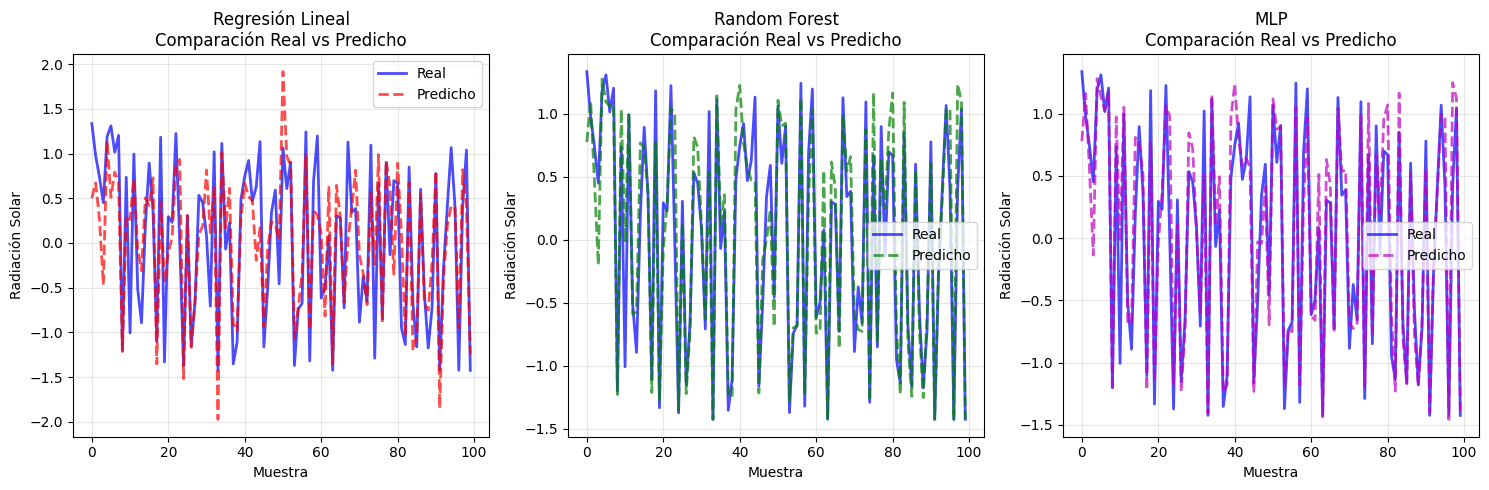

In [35]:
# ============================================================================
# 4. GRÁFICA 2: VALORES REALES VS PREDICHOS (LÍNEA)
# ============================================================================

# Tomar una muestra para visualización más clara
indices_muestra = np.random.choice(len(y_test), size=min(100, len(y_test)), replace=False)
y_test_muestra = y_test.iloc[indices_muestra]
lr_pred_muestra = lr_pred[indices_muestra]
rf_pred_muestra = rf_pred[indices_muestra]
mlp_pred_muestra = mlp_pred[indices_muestra]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(y_test_muestra.values, 'b-', label='Real', linewidth=2, alpha=0.7)
plt.plot(lr_pred_muestra, 'r--', label='Predicho', linewidth=2, alpha=0.7)
plt.xlabel('Muestra')
plt.ylabel('Radiación Solar')
plt.title('Regresión Lineal\nComparación Real vs Predicho')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(y_test_muestra.values, 'b-', label='Real', linewidth=2, alpha=0.7)
plt.plot(rf_pred_muestra, 'g--', label='Predicho', linewidth=2, alpha=0.7)
plt.xlabel('Muestra')
plt.ylabel('Radiación Solar')
plt.title('Random Forest\nComparación Real vs Predicho')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(y_test_muestra.values, 'b-', label='Real', linewidth=2, alpha=0.7)
plt.plot(mlp_pred_muestra, 'm--', label='Predicho', linewidth=2, alpha=0.7)
plt.xlabel('Muestra')
plt.ylabel('Radiación Solar')
plt.title('MLP\nComparación Real vs Predicho')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


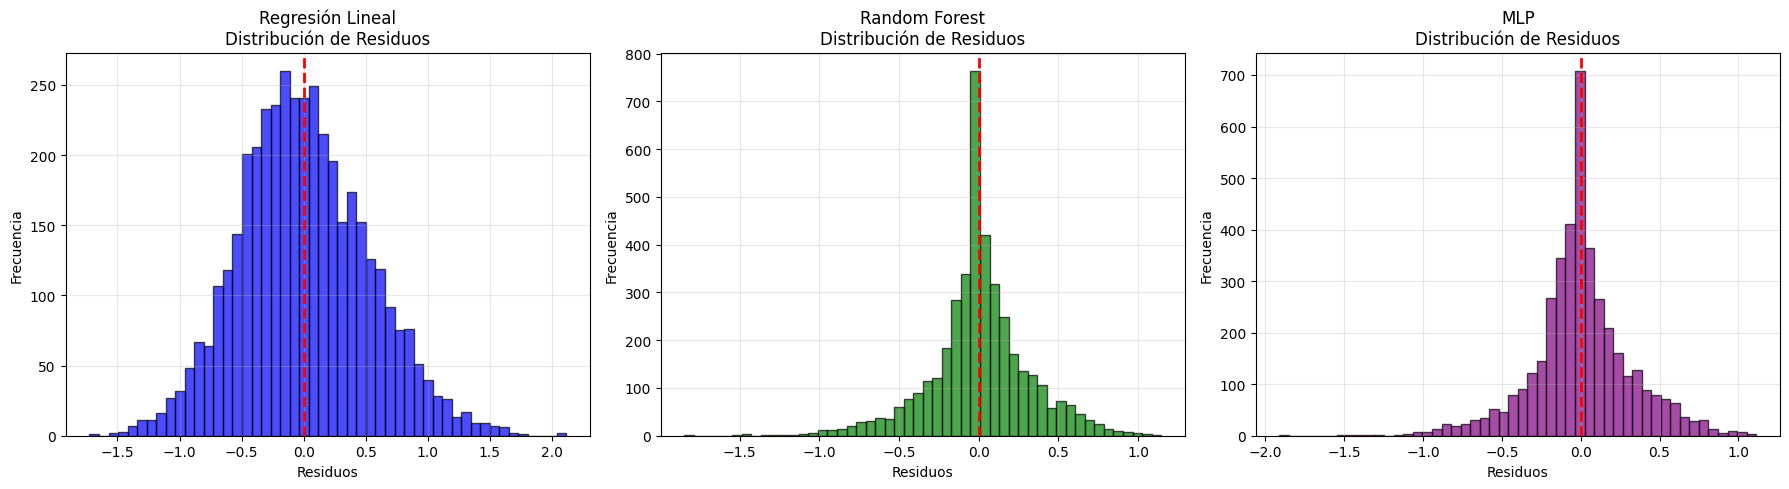

In [36]:
# ============================================================================
# 5. GRÁFICA 3: RESIDUOS (ERRORES)
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Calcular residuos
lr_residuos = y_test - lr_pred
rf_residuos = y_test - rf_pred
mlp_residuos = y_test - mlp_pred

# Histograma de residuos
axes[0].hist(lr_residuos, bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuos')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Regresión Lineal\nDistribución de Residuos')
axes[0].grid(True, alpha=0.3)

axes[1].hist(rf_residuos, bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Residuos')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Random Forest\nDistribución de Residuos')
axes[1].grid(True, alpha=0.3)

axes[2].hist(mlp_residuos, bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Residuos')
axes[2].set_ylabel('Frecuencia')
axes[2].set_title('MLP\nDistribución de Residuos')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


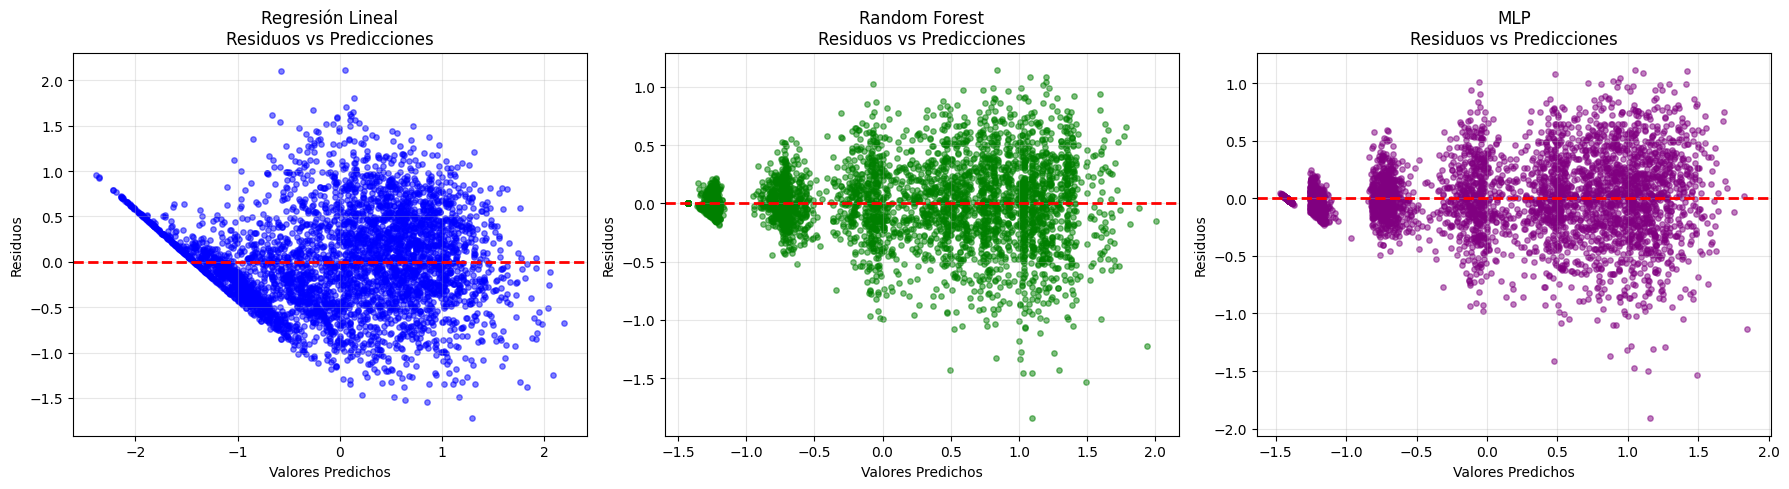

In [37]:
# ============================================================================
# 6. GRÁFICA 4: RESIDUOS VS VALORES PREDICHOS
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Regresión Lineal
axes[0].scatter(lr_pred, lr_residuos, alpha=0.5, s=15, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Valores Predichos')
axes[0].set_ylabel('Residuos')
axes[0].set_title('Regresión Lineal\nResiduos vs Predicciones')
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(rf_pred, rf_residuos, alpha=0.5, s=15, color='green')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Valores Predichos')
axes[1].set_ylabel('Residuos')
axes[1].set_title('Random Forest\nResiduos vs Predicciones')
axes[1].grid(True, alpha=0.3)

# MLP
axes[2].scatter(mlp_pred, mlp_residuos, alpha=0.5, s=15, color='purple')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Valores Predichos')
axes[2].set_ylabel('Residuos')
axes[2].set_title('MLP\nResiduos vs Predicciones')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


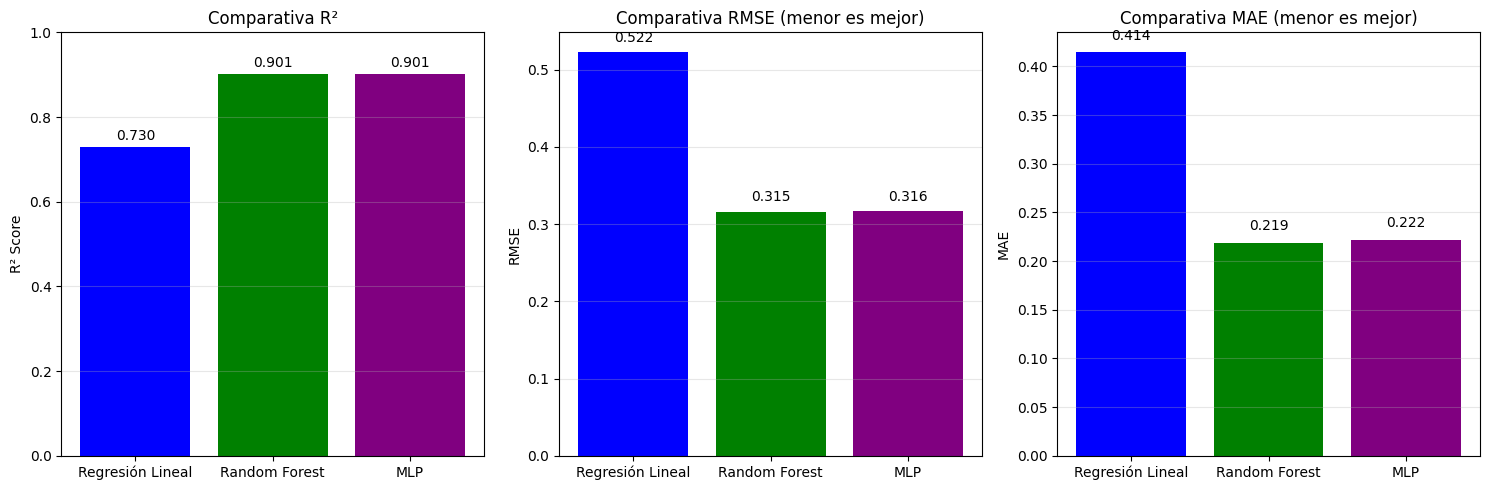

In [38]:
# ============================================================================
# 7. COMPARATIVA DE MÉTRICAS (GRÁFICO DE BARRAS)
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

modelos = list(metricas.keys())
r2_values = [metricas[m][0] for m in modelos]
rmse_values = [metricas[m][1] for m in modelos]
mae_values = [metricas[m][2] for m in modelos]

# R²
bars1 = axes[0].bar(modelos, r2_values, color=['blue', 'green', 'purple'])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Comparativa R²')
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')
# Añadir valores en las barras
for bar, val in zip(bars1, r2_values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.3f}', ha='center', va='bottom')

# RMSE
bars2 = axes[1].bar(modelos, rmse_values, color=['blue', 'green', 'purple'])
axes[1].set_ylabel('RMSE')
axes[1].set_title('Comparativa RMSE (menor es mejor)')
axes[1].grid(True, alpha=0.3, axis='y')
# Añadir valores en las barras
for bar, val in zip(bars2, rmse_values):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.3f}', ha='center', va='bottom')

# MAE
bars3 = axes[2].bar(modelos, mae_values, color=['blue', 'green', 'purple'])
axes[2].set_ylabel('MAE')
axes[2].set_title('Comparativa MAE (menor es mejor)')
axes[2].grid(True, alpha=0.3, axis='y')
# Añadir valores en las barras
for bar, val in zip(bars3, mae_values):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{val:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
